In [1]:
# Step 1: Data Preparation
import pandas as pd

# Step 1a: Prepare Training Data
df_train = pd.read_csv(
    "plant-train.csv")
df_train.columns = [
    "sepal_length", "sepal_width", "petal_length", "petal_width", "target"
]
train_cols = df_train.columns[0:-1]
train_label = df_train.columns[-1]
X_train = df_train[train_cols]
y_train = df_train[train_label]

In [2]:
# Step 1b: Prepare Test Data
df_test = pd.read_csv(
    "plant-test.csv")
df_test.columns = [
    "sepal_length", "sepal_width", "petal_length", "petal_width", "target"
]
test_cols = df_test.columns[0:-1]
test_label = df_test.columns[-1]
X_test = df_test[test_cols]
y_test = df_test[test_label]

In [3]:
# Step 2: Data normalization
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

# Step 2a: Normalize training data
X_train_norm=pd.DataFrame(scaler.fit_transform(X_train),
            columns=train_cols, index=X_train.index) 

# Step 2b: Normalize test data
X_test_norm=pd.DataFrame(scaler.fit_transform(X_test),
            columns=test_cols, index=X_test.index) 
print(X_train_norm)

    sepal_length  sepal_width  petal_length  petal_width
0       0.200000     0.590909      0.067797     0.041667
1       0.142857     0.363636      0.067797     0.041667
2       0.085714     0.454545      0.050847     0.041667
3       0.057143     0.409091      0.084746     0.041667
4       0.171429     0.636364      0.067797     0.041667
..           ...          ...           ...          ...
75      0.942857     0.363636      0.864407     0.916667
76      0.542857     0.545455      0.779661     0.958333
77      0.571429     0.409091      0.762712     0.708333
78      0.457143     0.363636      0.644068     0.708333
79      0.714286     0.409091      0.745763     0.833333

[80 rows x 4 columns]


In [4]:
# Step 3: Train Decision Tree Model using normalised training data
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

clf_norm_dt = DecisionTreeClassifier()
clf_norm_dt = clf_norm_dt.fit(X_train_norm, y_train)

[Text(0.5, 0.75, 'X[3] <= 0.375\ngini = 0.5\nsamples = 80\nvalue = [40, 40]'),
 Text(0.25, 0.25, 'gini = 0.0\nsamples = 40\nvalue = [40, 0]'),
 Text(0.75, 0.25, 'gini = 0.0\nsamples = 40\nvalue = [0, 40]')]

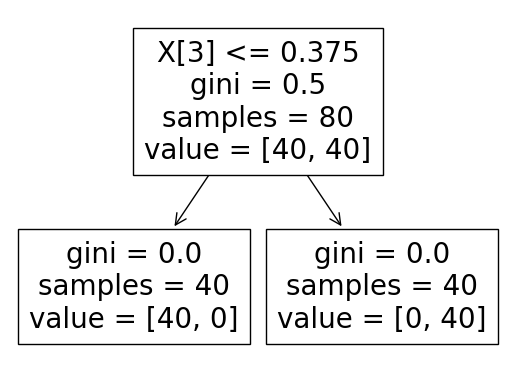

In [5]:
# Step 3 contd... Show decision tree for normalised data
tree.plot_tree(clf_norm_dt) 

In [6]:
# Step 4: Train Decision Tree Model using original training data - pre normalization
clf_dt = DecisionTreeClassifier()
clf_dt = clf_dt.fit(X_train, y_train)

[Text(0.5, 0.75, 'X[2] <= 3.2\ngini = 0.5\nsamples = 80\nvalue = [40, 40]'),
 Text(0.25, 0.25, 'gini = 0.0\nsamples = 40\nvalue = [40, 0]'),
 Text(0.75, 0.25, 'gini = 0.0\nsamples = 40\nvalue = [0, 40]')]

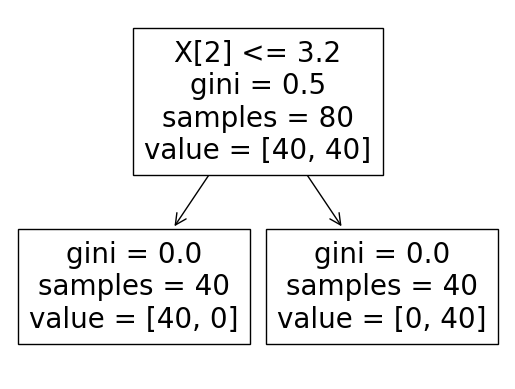

In [7]:
# Step 4 contd... Show decision tree for pre normalised data
tree.plot_tree(clf_dt) 

In [8]:
# Step 5: Check accuracy of normalised trained model with normalised test data
print(clf_norm_dt.score(X_test_norm, y_test))

1.0


In [9]:
# Step 6: Check accuracy of pre normalised trained model with pre normalised test data
print(clf_dt.score(X_test, y_test))

1.0


In [10]:
# Step 7: Train EBM Model using normalised training data and show a global explanation of this model, and local explantion for each normalised test instance
from interpret.glassbox import ExplainableBoostingClassifier
from interpret import show

ebm_norm = ExplainableBoostingClassifier(random_state=1)
ebm_norm.fit(X_train_norm, y_train)

ebm_global_norm = ebm_norm.explain_global()
show(ebm_global_norm)

ebm_local_norm = ebm_norm.explain_local(X_test_norm, y_test)
show(ebm_local_norm)

C:\Users\KOBrien\AppData\Roaming\Python\Python310\site-packages\interpret\visual\udash.py:5: UserWarning: 
The dash_html_components package is deprecated. Please replace
`import dash_html_components as html` with `from dash import html`
  import dash_html_components as html
C:\Users\KOBrien\AppData\Roaming\Python\Python310\site-packages\interpret\visual\udash.py:6: UserWarning: 
The dash_core_components package is deprecated. Please replace
`import dash_core_components as dcc` with `from dash import dcc`
  import dash_core_components as dcc
C:\Users\KOBrien\AppData\Roaming\Python\Python310\site-packages\interpret\visual\udash.py:7: UserWarning: 
The dash_table package is deprecated. Please replace
`import dash_table` with `from dash import dash_table`

Also, if you're using any of the table format helpers (e.g. Group), replace 
`from dash_table.Format import Group` with 
`from dash.dash_table.Format import Group`
  import dash_table as dt


<!-- http://127.0.0.1:7001/2943637931824/ -->

<!-- http://127.0.0.1:7001/2943637936000/ -->

In [11]:
# Step 8: Train EBM Model using the pre normalised training data and show a global explanation of this model, and local explantion for each pre normalised test instance
ebm = ExplainableBoostingClassifier(random_state=1)
ebm.fit(X_train, y_train)

ebm_global = ebm.explain_global()
show(ebm_global)

ebm_local = ebm.explain_local(X_test, y_test)
show(ebm_local)

<!-- http://127.0.0.1:7001/2943671725904/ -->

<!-- http://127.0.0.1:7001/2943671726144/ -->

In [12]:
# Step 9: Check accuracy of pre normalised trained model with pre normalised test data
print(ebm.score(X_test, y_test))

1.0


In [13]:
# Step 10: Check accuracy of normalised trained model with normalised test data
print(ebm_norm.score(X_test_norm, y_test))

1.0
